# Data Analysis for the Single Slit Diffraction Experiment
1. **Import Data:** Save data taken from the Raspberry Pi to the folder named "Files", make sure and copy the filename including the .csv at the end. In the cell below paste the file name after the 'Files/' in the line that begins with "array = "

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

#imports values from file into a numpy array
goop = np.genfromtxt ('Files/EDPH2024-10-11_105430.csv', delimiter=",")

2. **Select the Data:** In the cell below you will select the horizontal row of pixels you want to read the values of. 
    - First change the initials to yours to help you find the data that is saved
    - Run the cell, and in the text box that shows up input an inital guess of what numbered row you would like to take data of. You will get to change this row before you save data. 1500 is a good inital guess.
    - Next use the axes marked to refine your guesses until the red line covers the part of the picture you would like to take data of.
    - Enter save into the input box when you have the line where you want it. 
    - Enter break into the input box to leave the loop.

to exit, input: break
to save data, input: save


enter y-axis value, positive whole numbers only: 1250


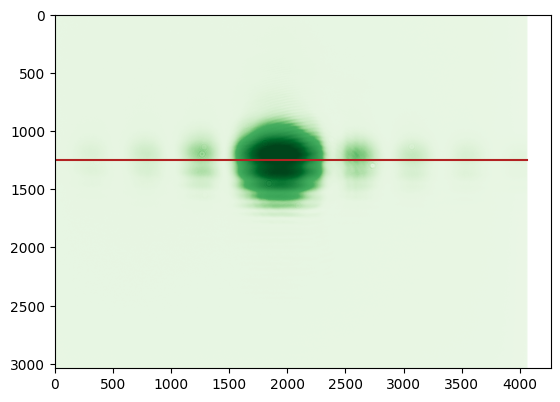

enter y-axis value, positive whole numbers only: save
enter y-axis value, positive whole numbers only: break


Program Stopping...


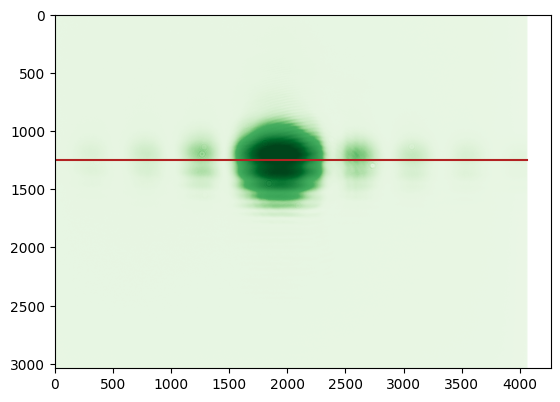

In [10]:
MYINITIALS = 'EDPH'

#Here is the filename construction based upon date and time.
ddtt = datetime.datetime.now()
nameformat="%Y%m%d_%H%M%S"
myrootfilename = 'Data/' + MYINITIALS + ddtt.strftime(nameformat)
csvname1 = myrootfilename+'firstrun.csv'
csvname2 = myrootfilename+'average.csv'
imagename = myrootfilename+'ImageWithLine.jpg'

# This detects the rows between data runs, they should be the only rows marked with a negative number
a,b = goop.shape
ind = []
i = 0 
while i<a:
    x = goop[i,0]
    if x < 0:
        ind.append(i)
    i += 1

#This splits up the big data array and saves it into a dictionary by the indexes found in the last step
lastx = 0
i1 = 0
names = {}

for x in ind:
    names["array"+str(i1)] = goop[lastx:x,:]
    lastx = x + 1
    i1+=1

#finds the width of the array of pixels, and sets the line we graph to the full width
total = names['array0']

a1,b1 = total.shape
nums = np.array([1,b1])

print("to exit, input: break") #prints the exit instructions
print("to save data, input: save") #prints the save instructions

while(True): #loop until break is entered
    
    #input that asks for the y value you would like to graph the line at
    value = input("enter y-axis value, positive whole numbers only:")
    
    #checks to see if break was entered, then stops the loop
    if(value=="break"):
        print("Program Stopping...")
        break
        
    #checks to see if the input is a positive number, then graphs a line at that y value
    elif(value.isdigit()):
        intvalue = float(value) #saves the value as a float
        ynums = np.array([intvalue,intvalue]) #creates an array to graph
        plt.figure()
        plt.imshow(total,cmap='Greens') #this line graphs the picture to the plt figure
        plt.plot(nums,ynums,color="firebrick") #graphs the line at the input y-value
        plt.show()
        
    elif(value=="save"):
        grn3 = pd.DataFrame(total) #converts the data to a pandas array for easier saving, then saves and graphs it
        grn3.to_csv(csvname1,index=False)
        plt.figure()
        plt.imshow(total,cmap='Greens') #this line graphs the picture to the plt figure
        plt.plot(nums,ynums,color="firebrick")        
        plt.savefig(imagename)

    #prints an "error" message
    else:
        print("entered value not a positive number")

3. **Graph your Data:** The data you selected is now saved to the Data folder. The file names were given to you as outputs as well. The next cell take the average of all your data runs at the line specified above, and filters out all but the green data. It will then graph the average you made. Simply run it and note the file name, that file is also saved to the Data folder.

Pixel Row:  1250
0       488.0
1       510.0
2       532.0
3       540.0
4       481.0
        ...  
2027    618.0
2028      0.0
2029      0.0
2030      0.0
2031      0.0
Name: Average, Length: 2032, dtype: float64


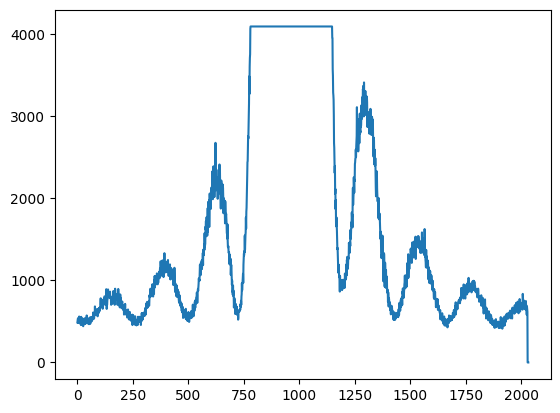

Data Saved As:  Data/EDPH20241011_110834average.csv


In [11]:
intvalue=int(intvalue) #converts the input value to an int

print("Pixel Row: ",intvalue) #outputs the value that was input

data = np.array(total[intvalue][:]) #collects the row of data points at the input y-value

#this step filters out the non green data. Even and odd rows of pixels act differently
if intvalue % 2 == 0:
    #its even
    gdata = data[1::2]
else:
    gdata = data[::2]

#this creates a Pandas Data Frame to hold all of the run's data
gpand = pd.DataFrame(gdata)

#this loop collects the data along the pixel selected from all runs and saves it to gpand
i=1
while i < len(names):
    arr = names['array'+str(i)]
    arr1 = np.array(arr[intvalue][:])
    if intvalue % 2 == 0:
        #its even
        gpand[str(i)] = arr1[1::2]
    else:
        gpand[str(i)] = arr1[::2]
    i+=1

#this calculates the average of all the data runs
avegpand = gpand.copy()
avegpand['Average'] = avegpand.mean(numeric_only=True, axis=1)
average = avegpand['Average']
print(average)

#this plots the average
plt.figure()
plt.plot(average)
plt.show()

#this saves your average data as a .csv
curve = pd.DataFrame(average)
curve.to_csv(csvname2,index=False)
print("Data Saved As: ",csvname2)

In [6]:
print(len(names))

2
